In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def computeParentPercent(experimentData,parent,column):
    #get all lines for this parent
    sons=experimentData[experimentData['Parent']==parent]
    declaredTotal = experimentData[experimentData['#name'] == parent][column]
    computedTotal = sum(sons[column])
    newColumnName = column + "_parentPercent"
    newColumn = sons[column]/computedTotal
    sons[newColumnName] = newColumn
    
    return sons
    


In [3]:
def computeParentPercentAll(experimentData):
    #add columns we need

    #experimentData['totParent']=np.nan
    
    #make som totals
    asd = experimentData.groupby(['Parent','Section']).aggregate(sum)
    asd = experimentData[experimentData.Section == "BODY"].groupby('Parent').aggregate(sum)
    asd.rename(columns={'cpuTime':'parentCpuTime','wallTime':'parentWallTime','Calls':'parentCalls'},inplace=True)
    
 
    experimentData = pd.merge(experimentData , asd , how='left', right_index=True, left_on='Parent')
    
    experimentData['wallTime_parentPercent']=np.nan
    experimentData['cpuTime_parentPercent']=np.nan
    experimentData['calls_parentPercent']=np.nan
    
    experimentData.cpuTime_parentPercent = experimentData.cpuTime / experimentData.parentCpuTime * 100
    experimentData.wallTime_parentPercent = experimentData.wallTime / experimentData.parentWallTime * 100
    experimentData.calls_parentPercent = experimentData.Calls / experimentData.parentCalls * 100
    return experimentData
    

In [4]:
datas = pd.read_csv('Co3O4-H2-conf1-scf.csv', skiprows=3,header=0)

In [5]:
#if in section BODY parent is NAN we are in the main function
datas.ix[pd.isnull(datas.Parent) & (datas.Section == "BODY"), 'Parent'] = 'main'

In [6]:
#computeParentPercent(datas,'electrons','cpuTime')
#computeParentPercent(datas,'electrons','wallTime')

datas = computeParentPercentAll(datas)
datas

,#name,cpuTime,wallTime,Calls,Parent,Section,parentCpuTime,parentWallTime,parentCalls,wallTime_parentPercent,cpuTime_parentPercent,calls_parentPercent
0,init_run,24780,25750,1,main,BODY,1680360,1756840,3,1.465700,1.474684,33.333333
1,electrons,1636950,1711640,1,main,BODY,1680360,1756840,3,97.427199,97.416625,33.333333
2,forces,18630,19450,1,main,BODY,1680360,1756840,3,1.107101,1.108691,33.333333
3,wfcinit,10550,10730,1,init_run,BODY,12540,12880,2,83.307453,84.130781,50.000000
4,potinit,1990,2150,1,init_run,BODY,12540,12880,2,16.692547,15.869219,50.000000
5,c_bands,911620,923390,52,electrons,BODY,1722920,1801290,369,51.262706,52.911337,14.092141
6,sum_band,472900,501600,52,electrons,BODY,1722920,1801290,369,27.846710,27.447589,14.092141
7,v_of_rho,87050,91410,53,electrons,BODY,1722920,1801290,369,5.074696,5.052469,14.363144
8,v_h,2870,3020,53,electrons,BODY,1722920,1801290,369,0.167658,0.166578,14.363144
9,v_xc,85760,90050,54,electrons,BODY,1722920,1801290,369,4.999195,4.977596,14.634146


In [7]:
#time to plot
toPlot = datas[ datas.Parent == 'electrons'][['#name','cpuTime_parentPercent']].set_index('#name') 

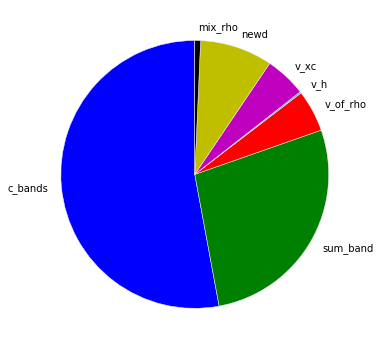

In [8]:
#toPlot.plot(kind='pie',subplots=True)
#use matplotlib for more controll
plt.figure(figsize=(6,6))
plt.pie(toPlot,labels = toPlot.index,startangle=90)
plt.show()

#the idea is to make a pie or a bar plot for every parent and make a nice figure

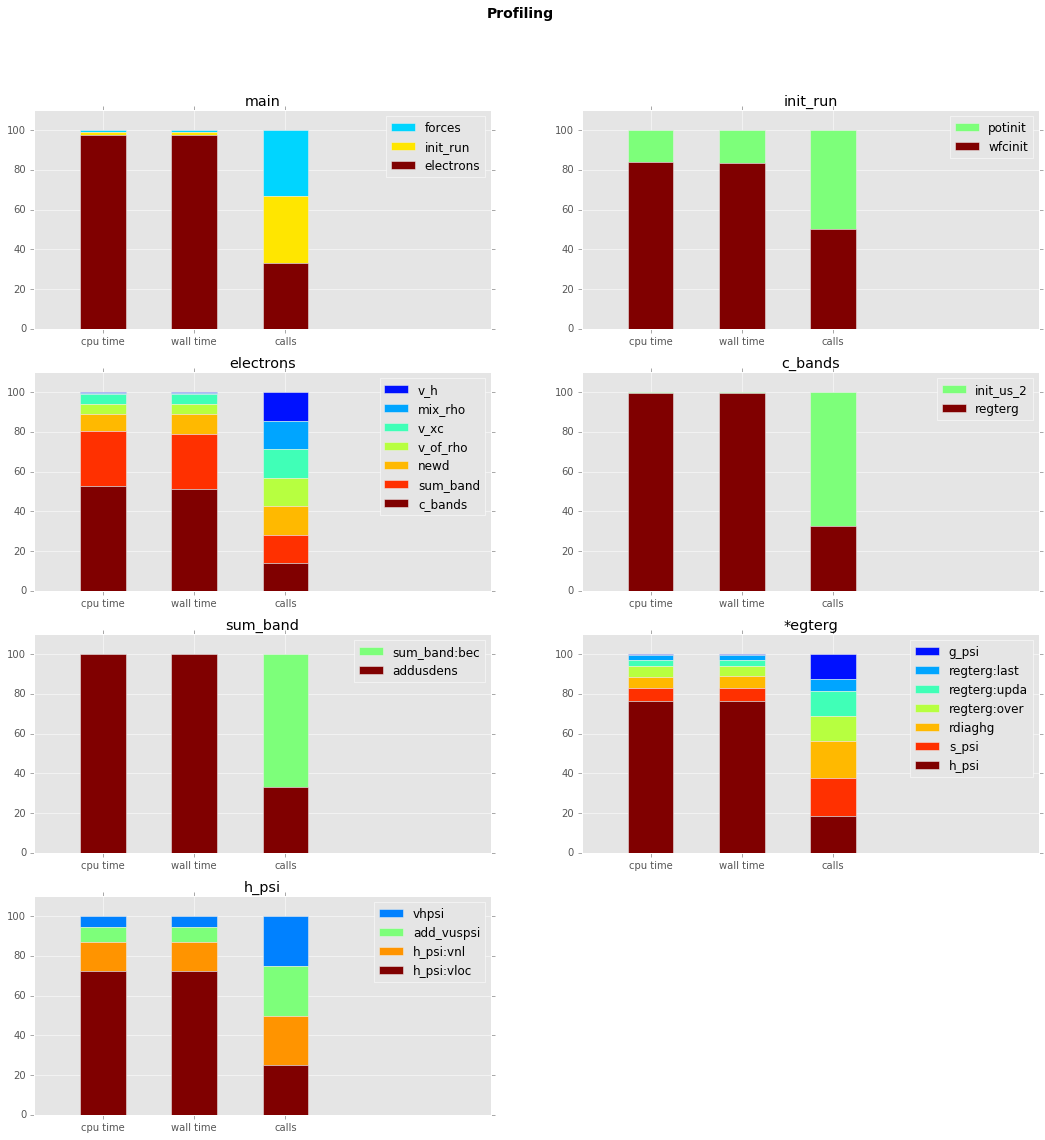

In [58]:
theParents = datas[datas.Section == "BODY"].Parent.unique()
subplotGridHight = len(theParents)/2 + len(theParents)%2
fig = plt.figure(1,figsize=(18,18))
k = 0
h = 0
fig.suptitle("Profiling", fontsize=14, fontweight='bold')
for parent in theParents:
    #print parent
    #print k,h
    ax = plt.subplot2grid((subplotGridHight,2), (k,h))
    h = (h+1)%2
    if h%2 == 0 : k = k+1
    
    toBarPlot = datas[(datas.Parent == parent) & (datas.Section == "BODY")][['#name','Parent','cpuTime_parentPercent','wallTime_parentPercent','calls_parentPercent']]

    #sort by most cpu demanding
    toBarPlot.sort_values('cpuTime_parentPercent',ascending = False, inplace=True)

    cpuOffsets = [0]
    wallOffsets = [0]
    callsOffsets = [0]
    for i,j,z in zip(toBarPlot.cpuTime_parentPercent,toBarPlot.wallTime_parentPercent,toBarPlot.calls_parentPercent) :
        cpuOffsets.append(cpuOffsets[len(cpuOffsets)-1] + i)
        wallOffsets.append(wallOffsets[len(wallOffsets)-1] + j)
        callsOffsets.append(callsOffsets[len(callsOffsets)-1] + z)
    cpuOffsets = cpuOffsets[:-1]
    wallOffsets = wallOffsets[:-1]
    callsOffsets = callsOffsets[:-1]

    cmap = plt.cm.jet
    zipped = zip(toBarPlot['#name'],
                 toBarPlot.cpuTime_parentPercent,toBarPlot.wallTime_parentPercent,toBarPlot.calls_parentPercent,
                 cpuOffsets,wallOffsets,callsOffsets,
                 range(0,len(toBarPlot['#name'])))
    #print in reverse order because we wnat the bottom stack to be the least in the legend
    #unfortunately managing the legend order is not so easy
    for name,cpu,wall,calls,cpuO,wallO,callsO,nth in reversed(zipped):
        plt.bar([1,3,5], #position of the bar
               [cpu,wall,calls],#height
               width=1,
               bottom=[cpuO,wallO,callsO],
                color = cmap(1- (float(nth)/len(toBarPlot['#name']))),
                label = name 
              )

    plt.xlim(0,10)
    plt.ylim(0,110)
    plt.title(parent)
    plt.xticks([1.5,3.5,5.5],['cpu time','wall time','calls'])
    plt.legend()